In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

importing important libraries


In [63]:
df=pd.read_csv("/content/bs140513_032310.csv")

reading the dataset using pandas

In [64]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


Taking an overview by looking at first five rows in dataframe using df.head()

In [65]:
for i in df.columns:
  print(i,df[i].unique())

step [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
customer ["'C1093826151'" "'C352968107'" "'C2054744914'" ... "'C1014783484'"
 "'C849065220'" "'C1809646275'"]
age ["'4'" "'2'" "'3'" "'5'" "'1'" "'6'" "'U'" "'0'"]
gender ["'M'" "'F'" "'E'" "'U'"]
zipcodeOri ["'28007'"]
merchant ["'M348934600'" "'M1823072687'" "'M

Observing what values are there under each column
After observing we can see we need to perform some data cleaning

In [66]:
df["customer"]=df["customer"].str.split("C").str[1]
df["customer"]=df["customer"].str.split("'").str[0].astype(int)


as we can see customer column has " ' " on both ends and starts with c we are removing all of that and converting it into integer type

In [67]:
df["merchant"]=df["merchant"].str.split("M").str[1]
df["merchant"]=df["merchant"].str.split("'").str[0].astype(int)

as we can see merchant column has " ' " on both ends and starts with m we are removing all of that and converting it into integer type

<Axes: xlabel='age', ylabel='Count'>

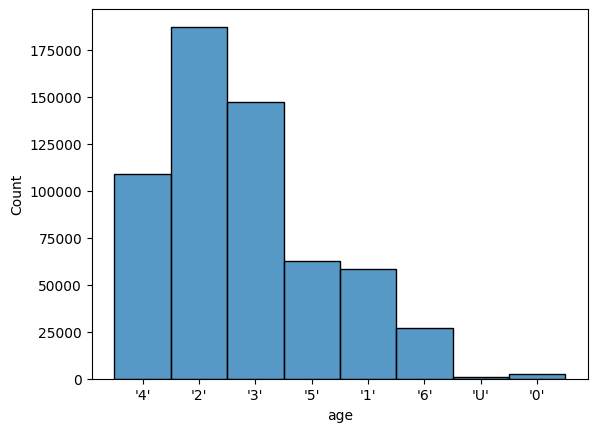

In [68]:
sns.histplot(df["age"])

In [69]:
value_to_drop = "'U'"
df = df[df['age'] != value_to_drop]
df['age']=df['age'].str.split("'").str[1].astype(int)

We have cleaned customer and merchant now it is time to clean age we are removing "u" and converting it into int

<Axes: xlabel='gender', ylabel='Count'>

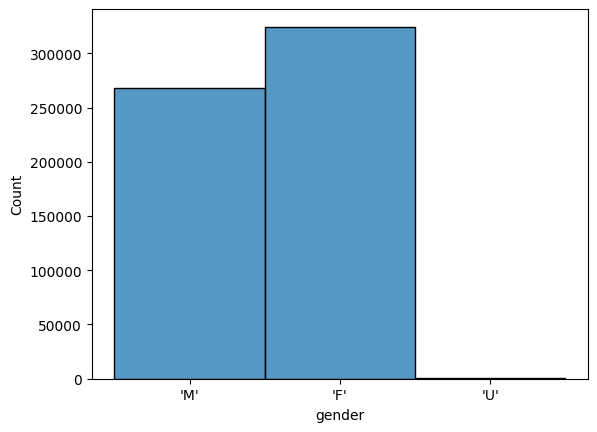

In [70]:
sns.histplot(df['gender'])

In [71]:
value_to_drop = "'U'"
df = df[df['gender'] != value_to_drop]
df=df.replace("'M'",1)
df=df.replace("'F'",0)

As there are very less values as "U" we can drop it, and mapping m as 1 and f as 0

In [73]:
df=df.drop(['zipcodeOri','zipMerchant'],axis=1)

# as we have changed almost all the values to integer type
we can observe that zipcodeori and zipMerchant have same values in all columns so we can drop it and it doesnt make a difference in models accuracy

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['category']=le.fit_transform(df['category'])

encoding the category as model cannot understand object type

# **Data splitting**

In [75]:
X=df.drop('fraud',axis=1)
y=df['fraud']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# **Model Traning**

**Random Forest Classifier**

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9960817382016471

**Decision Tree**

In [81]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier()
dsc.fit(X_train,y_train)
y_pred=dsc.predict(X_test)


In [82]:
accuracy_score(y_test,y_pred)

0.9940635804030694

**logistic regression**

In [83]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()
lrc.fit(X_train,y_train)
y_pred=lrc.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred)

0.9877786210191978

# **As Random forest has the highest accuracy we are selecting that model**

In [85]:
import pickle
pickle.dump(rfc,open("modelrffruad.pickle","wb"))

pickling model

In [86]:
pickle.dump(le,open("encoderfruad.pickle","wb"))

pickling label encoder